In [ ]:
import numpy as np
#doc dia chi hinh anh
import os
#xu ly ve hinh anh
from PIL import Image

In [ ]:
#khai bien doc dia chi
train_data ='drive/MyDrive/baitapvenha3/traicay/train'
validation_data ='drive/MyDrive/baitapvenha3/traicay/validation'

In [ ]:
listdata_train=[]
listdata_validation=[]
dict={'cachua':[0],'cam':[1],'chuoi':[2],'dua':[3],'duahau':[4],'dudu':[5],'mit':[6],'oi':[7],'saurieng':[8],'xoai':[9]}

In [ ]:
def Getdata(dirdata,lstdata):
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = Image.open(filename_path)
        img=np.array(img.resize((150,150),Image.ANTIALIAS))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_validation=Getdata(validation_data,listdata_validation)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(2000, 1)

In [ ]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(200, 150, 150, 3)

In [ ]:
x_train.shape

(2000, 150, 150, 3)

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
yname=y_train.flatten()
class_names=['cachua','cam','chuoi','dua','duahau','dudu','mit','oi','saurieng','xoai']

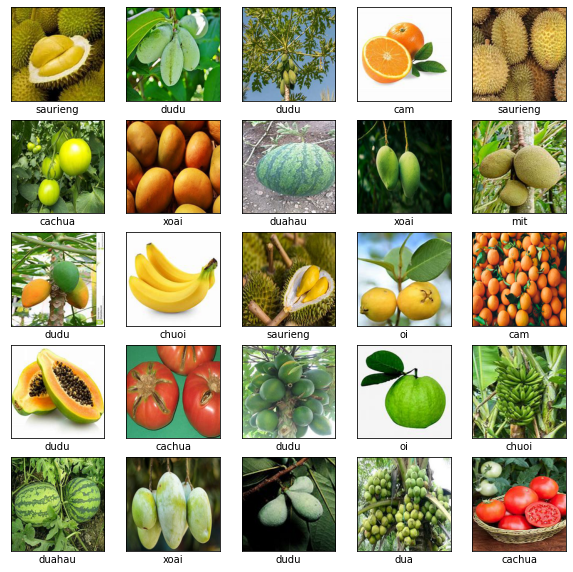

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
x_train=x_train.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,10)
y_validation= np_utils.to_categorical(y_validation,10)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(x_train,y_train,epochs=100,batch_size=150,verbose=1, validation_data=(x_validation,y_validation), callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
14/14 [==============================] - 40s 1s/step - loss: 2.6062 - accuracy: 0.1070 - val_loss: 2.2966 - val_accuracy: 0.1500
Epoch 2/100
14/14 [==============================] - 10s 701ms/step - loss: 2.2919 - accuracy: 0.1205 - val_loss: 2.2558 - val_accuracy: 0.1800
Epoch 3/100
14/14 [==============================] - 10s 704ms/step - loss: 2.1944 - accuracy: 0.1965 - val_loss: 2.0615 - val_accuracy: 0.2950
Epoch 4/100
14/14 [==============================] - 10s 707ms/step - loss: 2.1168 - accuracy: 0.1930 - val_loss: 1.9450 - val_accuracy: 0.3000
Epoch 5/100
14/14 [==============================] - 10s 711ms/step - loss: 1.9738 - accuracy: 0.2495 - val_loss: 1.8947 - val_accuracy: 0.2600
Epoch 6/100
14/14 [==============================] - 10s 715ms/step - loss: 1.8821 - accuracy: 0.3025 - val_loss: 1.9269 - val_accuracy: 0.2850
Epoch 7/100
14/14 [==============================] - 10s 721ms/step - loss: 1.8083 - accuracy: 0.3125 - val_loss: 1.5724 - val_accuracy: 0.

In [ ]:
model.save("Nhan_dien_trai_cay.h5")

In [ ]:
model_trai_cay=load_model('Nhan_dien_trai_cay.h5')

<function matplotlib.pyplot.show>

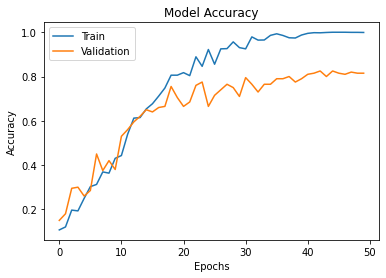

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

cachua


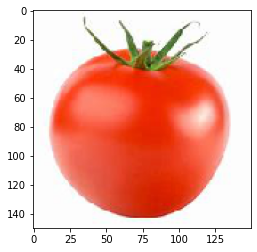

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/cachua.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

xoai


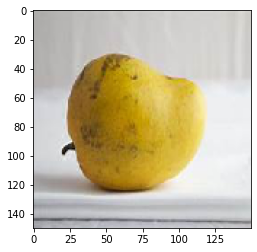

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/xoai.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

saurieng


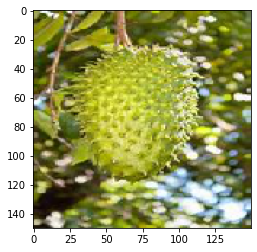

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/saurieng.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

mit


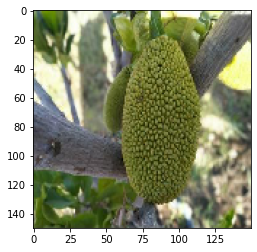

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/mit.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

duahau


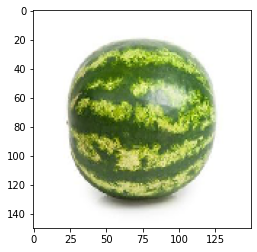

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/duahau.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

dudu


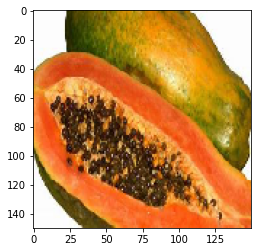

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/dudu.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

chuoi


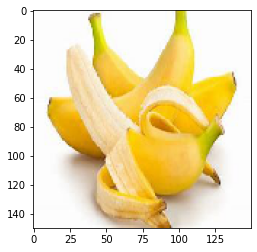

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/chuoi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

cam


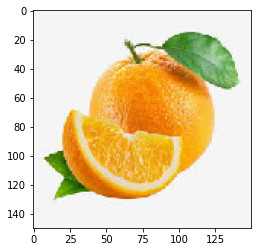

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/cam.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

dua


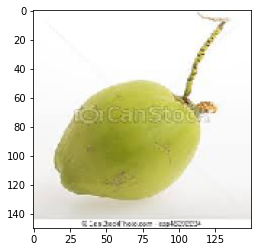

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/dua.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)

oi


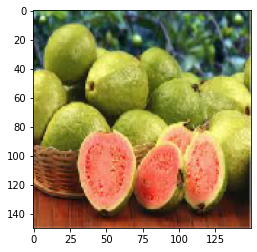

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/traicay/test/oi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_trai_cay.predict(img)
if round(result[0][0])==1:
  prediction='cachua'
if round(result[0][1])==1:
  prediction='cam'
if round(result[0][2])==1:
  prediction='chuoi'
if round(result[0][3])==1:
  prediction='dua'
if round(result[0][4])==1:
  prediction='duahau'
if round(result[0][5])==1:
  prediction='dudu'
if round(result[0][6])==1:
  prediction='mit'
if round(result[0][7])==1:
  prediction='oi'
if round(result[0][8])==1:
  prediction='saurieng'
if round(result[0][9])==1:
  prediction='xoai'
print(prediction)